In [1]:
import pandas as pd
import numpy as np
import acquire as a
import prepare as p
import model_functions as m

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
import scikitplot as skplt


import warnings
warnings.filterwarnings('ignore')


In [2]:
#acquiring data, prepping, splitting, isolating target variable

df = a.get_heart()
df = p.rename_cols(df)
df = p.replace_cat_values(df)
df = m.df_classification_ready(df, 'sex_female')
train, val, test = p.split_data(df, 'high_risk_of_mi')
X_Train, y_Train, X_val, y_val, X_test, y_test = m.isolate_target(train, val, test, 'high_risk_of_mi')

#showing results of decision tree models
dec_tree_results = m.get_decision_tree_multiple(X_Train, y_Train, X_val, y_val)
dec_tree_results

,min_samples_per_leaf,max_depth,train_accuracy,validate_accuracy,difference
0,1,2,0.791045,0.862745,-0.071700
27,4,5,0.875622,0.862745,0.012877
24,4,2,0.791045,0.862745,-0.071700
40,6,2,0.791045,0.862745,-0.071700
50,7,4,0.850746,0.862745,-0.011999
51,7,5,0.850746,0.862745,-0.011999
19,3,5,0.905473,0.862745,0.042728
52,7,6,0.850746,0.862745,-0.011999
53,7,7,0.850746,0.862745,-0.011999
16,3,2,0.791045,0.862745,-0.071700


In [25]:
# function from modeling_functions.py copy/pasted here for editing


def get_decision_tree_multiple(X_Train, y_Train, X_val, y_val):
    metrics = []

    #create many decision tree models trying different hyperparameters and get the best performance
    for j in range (1, 10):
        for i in range(2, 10):
            clf = DecisionTreeClassifier(max_depth=i, min_samples_leaf=j, random_state=123)

            clf = clf.fit(X_Train, y_Train)
                        
            # make predictions on train set
            y_pred_train = clf.predict(X_Train)
            # estimate probability
            y_pred_proba_train = clf.predict_proba(X_Train)
            # make predicitons on val set
            y_pred_val = clf.predict(X_val)
            # estimate probability on val set
            y_pred_proba_val = clf.predict_proba(X_val)

            #calculate recall
            in_sample_recall = recall_score(y_Train, y_pred_train, pos_label=1)
            out_of_sample_recall = recall_score(y_val, y_pred_val, pos_label=1)

            output = {
                "min_samples_per_leaf": j,
                "max_depth": i,
                "train_recall": in_sample_recall,
                "validate_recall": out_of_sample_recall,
            }

            metrics.append(output)
            

    df1 = pd.DataFrame(metrics)
    #make new column to calculate difference in accuracy between train and val
    df1["difference"] = df1['train_recall'] - df1['validate_recall']
    df1_sorted = df1.sort_values(by=['validate_recall'], ascending=False).head(10)
    

    return df1_sorted


In [23]:
dec_tree_results, y_pred_train, y_pred_proba_train, y_pred_val, y_pred_proba_val = get_decision_tree_multiple(X_Train, y_Train, X_val, y_val)

In [26]:
get_decision_tree_multiple(X_Train, y_Train, X_val, y_val)

,min_samples_per_leaf,max_depth,train_recall,validate_recall,difference
0,1,2,0.788991,0.857143,-0.068152
16,3,2,0.788991,0.857143,-0.068152
32,5,2,0.788991,0.857143,-0.068152
40,6,2,0.788991,0.857143,-0.068152
7,1,9,1.000000,0.857143,0.142857
8,2,2,0.788991,0.857143,-0.068152
24,4,2,0.788991,0.857143,-0.068152
1,1,3,0.954128,0.821429,0.132700
26,4,4,0.935780,0.821429,0.114351
25,4,3,0.935780,0.821429,0.114351


In [5]:
#create a DataFrame for Train target variable actual values and predicted values
actual_preds_train = pd.DataFrame({'actual' : y_Train,
                      'prediction' : y_pred_train})
actual_preds_train

,actual,prediction
202,0,0
223,0,0
265,0,1
115,1,1
270,0,0
...,...,...
179,0,0
280,0,0
144,1,1
285,0,0


In [6]:
#create a DataFrame for Train target variable actual values and predicted values
actual_preds_val = pd.DataFrame({'actual' : y_val,
                      'prediction' : y_pred_val})
actual_preds_val

,actual,prediction
180,0,0
193,0,0
6,1,1
143,1,0
208,0,0
57,1,1
205,0,0
250,0,0
161,1,1
240,0,0


In [7]:
# confusion matrix train
confusion_matrix(actual_preds_train.actual, actual_preds_train.prediction,
                 labels = (1, 0))



array([[89, 20],
       [14, 78]])

<AxesSubplot:title={'center':'Train Confusion Matrix for Decision Tree'}, xlabel='Predicted label', ylabel='True label'>

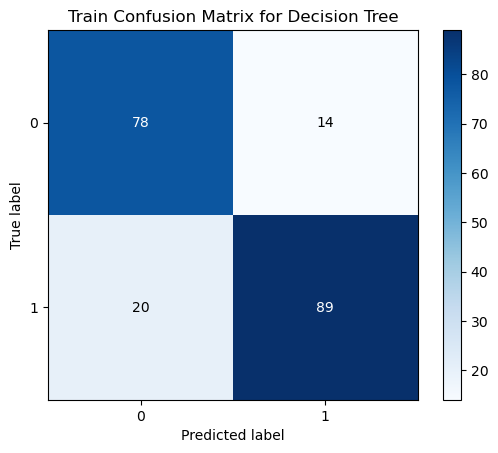

In [8]:
#plotting confusion matrix
skplt.metrics.plot_confusion_matrix(y_Train, y_pred_train, normalize=False, title = 'Train Confusion Matrix for Decision Tree')

In [9]:
#confusion matrix val
confusion_matrix(actual_preds_val.actual, actual_preds_val.prediction,
                 labels = (1, 0))


array([[20,  8],
       [ 1, 22]])

<AxesSubplot:title={'center':'Validate Confusion Matrix for Decision Tree'}, xlabel='Predicted label', ylabel='True label'>

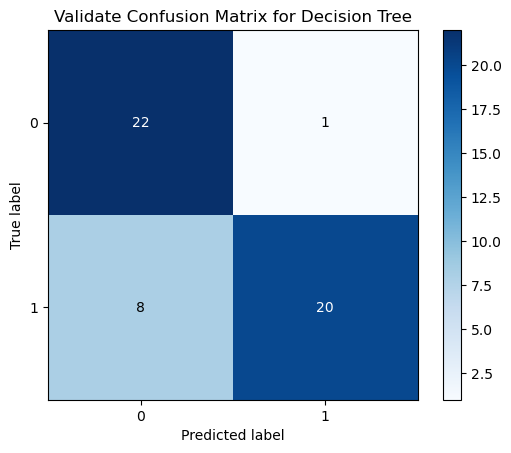

In [10]:
#plotting confusion matrix
skplt.metrics.plot_confusion_matrix(y_val, y_pred_val, normalize=False, title = 'Validate Confusion Matrix for Decision Tree')

Dataframes:
actual_preds_train
actual_preds_val


In [11]:


def calculate_recall_decision_tree(y_true, y_pred):
    """
     Args:
        y_true (array-like): True labels.
        y_pred (array-like): Predicted labels.

    Returns:
        float: Recall score.
    """
    recall = recall_score(y_true, y_pred, pos_label=1)
    return recall


# change model evaluation formulas to recall from accuracy

In [12]:
#function to run multiple random forest to compare for best accuracy
def get_decision_tree_multiple(X_Train, y_Train, X_val, y_val):
    metrics = []

    for j in range (1, 10):
        for i in range(2, 10):
            clf = DecisionTreeClassifier(max_depth=i, min_samples_leaf=j, random_state=123)

            clf = clf.fit(X_Train, y_Train)
            in_sample_accuracy = clf.score(X_Train, y_Train)
            out_of_sample_accuracy = clf.score(X_val, y_val)
            #in_sample_recall = 
            #out_of_sample_recall = 
            #in_sample_precision = 
            #out_of_sample_precision = 
            output = {
                "min_samples_per_leaf": j,
                "max_depth": i,
                "train_accuracy": in_sample_accuracy,
                "validate_accuracy": out_of_sample_accuracy,
                #"train_recall": ,
                #"validate_recall": ,
            }
    
            metrics.append(output)

    df1 = pd.DataFrame(metrics)
    df1["difference"] = df1.train_accuracy - df1.validate_accuracy
    df1_sorted = df1.sort_values(by=['validate_accuracy'], ascending=False).head(10)

    return df1_sorted

In [13]:
#calculate model recall

def calc_recall(df):
    subset = df[df.actual == 1]
    baseline_prediction = df.actual.mode()

    model_recall = (subset.prediction == subset.actual).mean()
    baseline_recall = (subset.actual == subset.actual).mean()

    print(f'   model recall: {model_recall:.2%}')
    print(f'baseline recall: {baseline_recall:.2%}')



In [14]:
actual_preds_train

,actual,prediction
202,0,0
223,0,0
265,0,1
115,1,1
270,0,0
...,...,...
179,0,0
280,0,0
144,1,1
285,0,0


In [15]:
model_recall = (actual_preds_train.prediction == actual_preds_train.actual).mean()
baseline_recall = (actual_preds_train.baseline_prediction == actual_preds_train.actual).mean()

print(f'   model recall: {model_recall:.2%}')
print(f'baseline recall: {baseline_recall:.2%}')


AttributeError: 'DataFrame' object has no attribute 'baseline_prediction'

In [ ]:
# DECISION TREE

In [ ]:
# RANDOM FOREST

In [ ]:
# KNN